In [1]:
library(caret)

Warning message:
: package 'caret' was built under R version 3.3.2Loading required package: lattice
Loading required package: ggplot2
Warning message:
: package 'ggplot2' was built under R version 3.3.2

In [4]:
car = read.csv('../0909/automobile.csv')

In [5]:
head(car)

,symboling,normalized_losses,maker,fuel,aspiration,doors,body,wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
1,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10,102,5500,24,30,13950
2,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8,115,5500,18,22,17450
3,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
4,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
5,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.5,2.8,8.8,101,5800,23,29,16430
6,0,192,bmw,gas,std,four,sedan,rwd,front,101.2,...,108,mpfi,3.5,2.8,8.8,101,5800,23,29,16925


## 데이터 분할 

In [6]:
set.seed(1234)

In [7]:
idx <- createDataPartition(car$price, p=.5, list=F, times = 1)

In [8]:
train.data <- car[idx,]
test.data <- car[-idx,]

## 훈련 방법 설정

In [9]:
tr <- trainControl(
  method = 'repeatedcv',
  repeats = 1,
  number = 5)

## 연속 변수 고르기

In [10]:
cont = sapply(car, is.numeric)
cont

symboling normalized_losses             maker              fuel 
             TRUE              TRUE             FALSE             FALSE 
       aspiration             doors              body            wheels 
            FALSE             FALSE             FALSE             FALSE 
  engine_location        wheel_base            length             width 
            FALSE              TRUE              TRUE              TRUE 
           height       curb_weight       engine_type         cylinders 
             TRUE              TRUE             FALSE             FALSE 
      engine_size       fuel_system              bore            stroke 
             TRUE             FALSE              TRUE              TRUE 
compression_ratio        horsepower          peak_rpm          city_mpg 
             TRUE              TRUE              TRUE              TRUE 
      highway_mpg             price 
             TRUE              TRUE

In [11]:
names(car)[cont]

[1] "symboling"         "normalized_losses" "wheel_base"       
 [4] "length"            "width"             "height"           
 [7] "curb_weight"       "engine_size"       "bore"             
[10] "stroke"            "compression_ratio" "horsepower"       
[13] "peak_rpm"          "city_mpg"          "highway_mpg"      
[16] "price"

## Elastic Net

In [12]:
elst.Grid <- expand.grid(
  .alpha = seq(0, 1, 0.2),
  .lambda = c(0.001, 0.01, 0.1))

In [13]:
elst.Model <- train(
  price ~ ., 
  data = train.data[cont],
  method = 'glmnet',
  preProc = c('center', 'scale'),
  metric = 'RMSE',
  tuneGrid = elst.Grid,
  trControl = tr)

Loading required package: glmnet
Warning message:
: package 'glmnet' was built under R version 3.3.2Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-5



In [14]:
elst.Model

glmnet 

80 samples
15 predictors

Pre-processing: centered (15), scaled (15) 
Resampling: Cross-Validated (5 fold, repeated 1 times) 
Summary of sample sizes: 64, 64, 64, 64, 64 
Resampling results across tuning parameters:

  alpha  lambda  RMSE      Rsquared 
  0.0    0.001   2315.522  0.8687130
  0.0    0.010   2315.522  0.8687130
  0.0    0.100   2315.522  0.8687130
  0.2    0.001   2190.057  0.8794809
  0.2    0.010   2190.057  0.8794809
  0.2    0.100   2190.057  0.8794809
  0.4    0.001   2190.105  0.8795087
  0.4    0.010   2190.105  0.8795087
  0.4    0.100   2190.105  0.8795087
  0.6    0.001   2189.619  0.8795530
  0.6    0.010   2189.619  0.8795530
  0.6    0.100   2189.619  0.8795530
  0.8    0.001   2189.180  0.8795551
  0.8    0.010   2189.180  0.8795551
  0.8    0.100   2189.180  0.8795551
  1.0    0.001   2189.322  0.8795290
  1.0    0.010   2189.322  0.8795290
  1.0    0.100   2189.322  0.8795290

RMSE was used to select the optimal model using  the smallest value.
T

In [15]:
price.elst = predict(elst.Model, test.data)

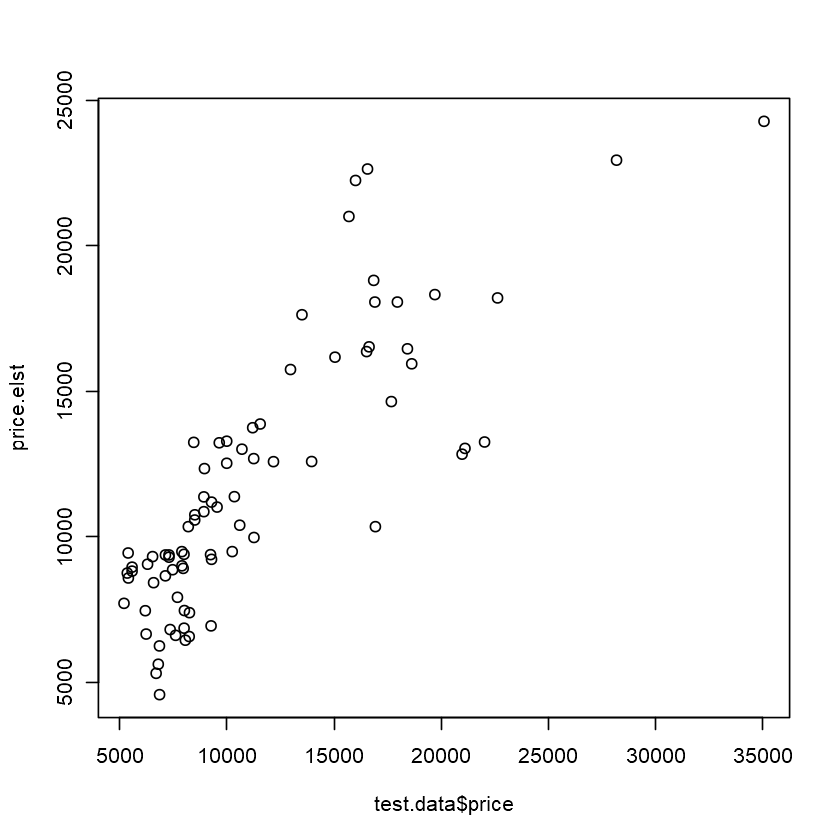

In [16]:
plot(test.data$price, price.elst)

## 오차

In [18]:
mse = mean((test.data$price - price.elst)^2)
mse

[1] 10455857

In [19]:
var.price = var(test.data$price)
var.price

[1] 32044347

In [20]:
(var.price - mse) / var.price

[1] 0.6737067